In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/mscMLNotebooks')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

riceDataset = fetch_ucirepo(id=545)
featuresData = riceDataset.data.features
labelData = riceDataset.data.targets

print(riceDataset.metadata)
print(riceDataset.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [11]:
print(featuresData.shape)
print(labelData.shape)

(3810, 7)
(3810, 1)


In [12]:
import pandas as pd

df = pd.concat([featuresData,labelData],axis=1)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [23]:
df["Class"] = (df["Class"] == "Cammeo").astype(int)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,0
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,0
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,0
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,0


Area


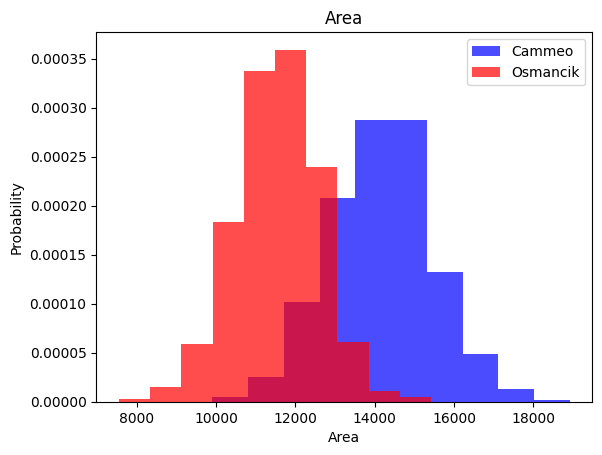

Perimeter


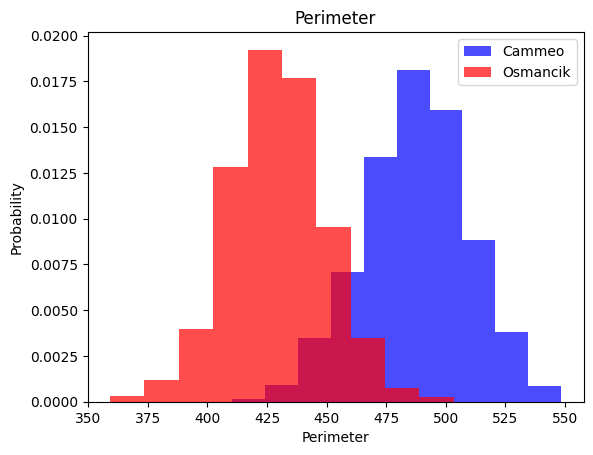

Major_Axis_Length


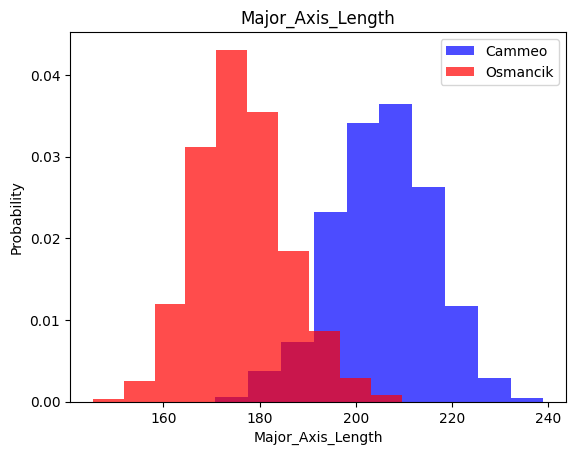

Minor_Axis_Length


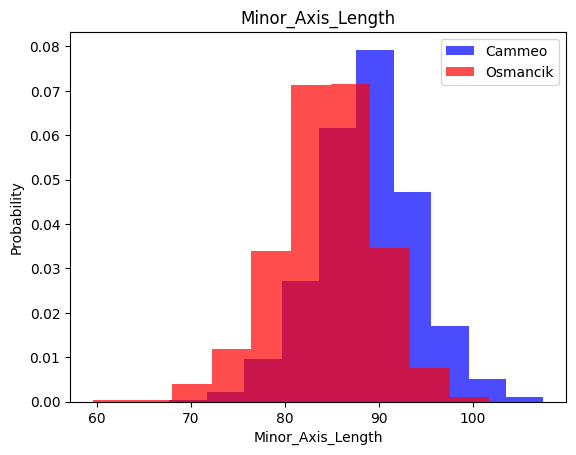

Eccentricity


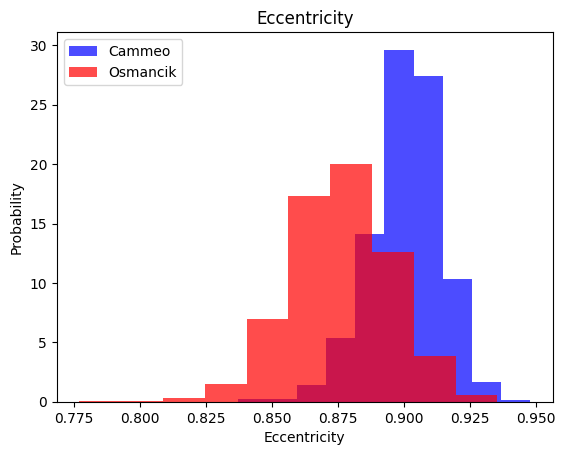

Convex_Area


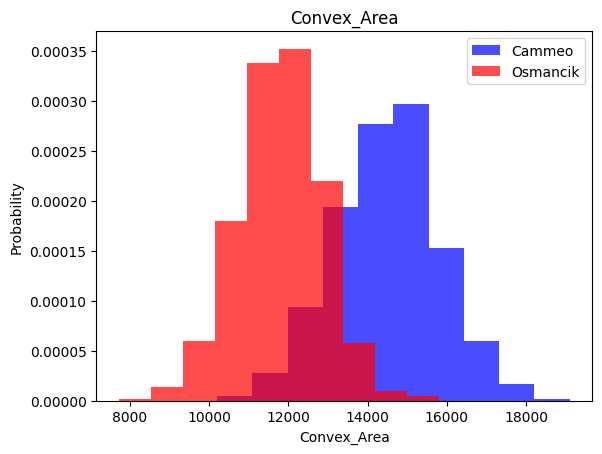

Extent


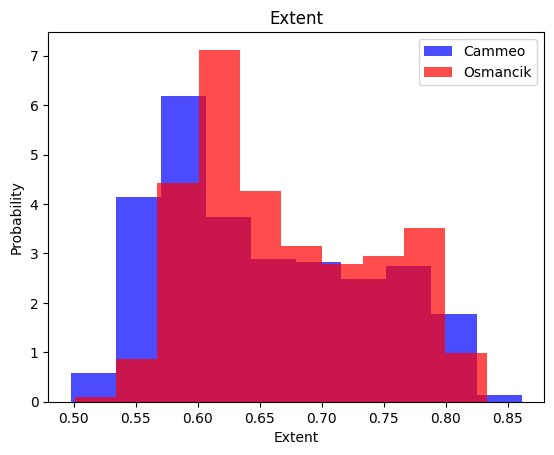

In [25]:
for feature in df.columns[:-1]:
  print(feature)
  plt.hist(df[df["Class"]==1][feature],color='blue',label='Cammeo',alpha=0.7,density=True)
  plt.hist(df[df["Class"]==0][feature],color='red',label='Osmancik',alpha=0.7,density=True)
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

In [26]:
# storing renamed labels
renamedLabel = df.iloc[:,-1]
renamedLabel

0       1
1       1
2       1
3       1
4       1
       ..
3805    0
3806    0
3807    0
3808    0
3809    0
Name: Class, Length: 3810, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featuresData, renamedLabel, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Training Set

In [28]:
X_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
587,14189,483.937012,203.377594,90.077690,0.896567,14538,0.713123
2823,12605,445.692993,183.269257,88.236824,0.876468,12787,0.617589
1845,12075,430.471008,176.182816,88.514061,0.864636,12248,0.802326
2329,10583,401.309998,164.735611,82.486282,0.865610,10769,0.723476
2105,11542,426.403992,175.276077,84.456894,0.876253,11738,0.627283
...,...,...,...,...,...,...,...
766,15123,518.257996,226.381439,85.840782,0.925320,15378,0.636919
1624,15290,500.187988,204.153366,96.690331,0.880731,15605,0.788958
939,13576,475.049988,200.999420,86.548996,0.902546,13888,0.583287
3493,12671,448.119995,181.493820,90.351112,0.867281,12949,0.740648


In [29]:
y_train

587     1
2823    0
1845    0
2329    0
2105    0
       ..
766     1
1624    1
939     1
3493    0
3386    0
Name: Class, Length: 2286, dtype: int64

Validation Set

In [30]:
X_val

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
734,13913,493.606995,212.985474,83.991348,0.918959,14218,0.572128
3035,12228,441.156006,176.110352,90.813210,0.856793,12587,0.692962
398,15558,511.717987,213.977600,94.464714,0.897276,15926,0.632439
362,16085,520.705994,217.496307,95.405571,0.898656,16514,0.702709
2626,11617,418.454010,167.914749,88.907570,0.848322,11822,0.760673
...,...,...,...,...,...,...,...
136,16053,523.840027,220.913773,93.891678,0.905186,16496,0.747973
1777,11719,430.511993,175.517456,86.510010,0.870094,12000,0.699308
3415,11091,416.945007,171.774078,82.734550,0.876365,11292,0.610133
2729,11625,430.433990,176.332947,86.159950,0.872496,11838,0.596797


In [31]:
y_val

734     1
3035    0
398     1
362     1
2626    0
       ..
136     1
1777    0
3415    0
2729    0
3497    0
Name: Class, Length: 762, dtype: int64

Test Set

In [32]:
X_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
1011,12442,459.535004,187.508850,87.187302,0.885323,12941,0.587580
3185,12408,437.014008,179.741165,88.829605,0.869343,12598,0.636928
3698,12867,449.079987,181.700561,91.341064,0.864460,13152,0.649062
897,13090,472.945007,202.601578,83.230179,0.911722,13331,0.775290
3245,10359,409.510986,173.337967,76.875809,0.896273,10510,0.573588
...,...,...,...,...,...,...,...
1366,14802,497.832001,209.617950,91.147133,0.900515,15208,0.622980
644,17192,528.341980,222.949936,99.092674,0.895798,17457,0.628914
2634,11234,425.931000,176.301987,82.101532,0.884950,11452,0.655579
1171,13982,479.785004,204.542389,88.279648,0.902067,14221,0.772913


In [33]:
y_test

1011    1
3185    0
3698    0
897     1
3245    0
       ..
1366    1
644     1
2634    0
1171    1
1569    1
Name: Class, Length: 762, dtype: int64

# Decision Tree for Model 1
Dataset is not scaled/normalized

In [34]:
# Decision Tree classifier for the dataset when not scaled/normalized

from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
model = tree_classifier.fit(X_train, y_train)

[Text(0.466376582278481, 0.9736842105263158, 'x[2] <= 190.641\ngini = 0.486\nsamples = 2286\nvalue = [1335, 951]'),
 Text(0.19897151898734178, 0.9210526315789473, 'x[2] <= 181.237\ngini = 0.094\nsamples = 1301\nvalue = [1237, 64]'),
 Text(0.07832278481012658, 0.868421052631579, 'x[6] <= 0.824\ngini = 0.019\nsamples = 958\nvalue = [949, 9]'),
 Text(0.058544303797468354, 0.8157894736842105, 'x[2] <= 178.608\ngini = 0.017\nsamples = 956\nvalue = [948, 8]'),
 Text(0.0379746835443038, 0.7631578947368421, 'x[1] <= 443.115\ngini = 0.007\nsamples = 818\nvalue = [815, 3]'),
 Text(0.02531645569620253, 0.7105263157894737, 'x[6] <= 0.604\ngini = 0.005\nsamples = 800\nvalue = [798, 2]'),
 Text(0.0189873417721519, 0.6578947368421053, 'x[6] <= 0.604\ngini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(0.012658227848101266, 0.6052631578947368, 'x[2] <= 177.151\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(0.006329113924050633, 0.5526315789473685, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]

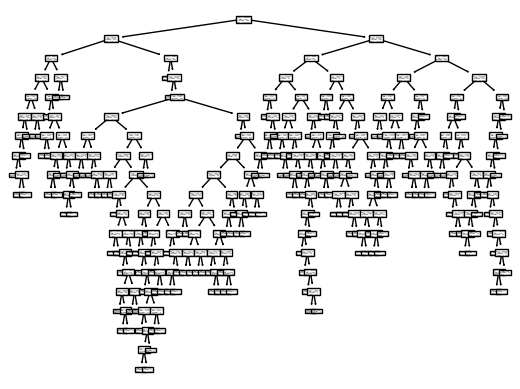

In [35]:
tree.plot_tree(model)

In [36]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model, out_file=None)
graph_rice = graphviz.Source(dot_data)
graph_rice.render("graph_rice")

'graph_rice.pdf'

In [37]:
y_pred = model.predict(X_val)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Printing evaluation Metrics for the model')
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F-1 Score: ", f1)

Printing evaluation Metrics for the model
Precision:  0.8840125391849529
Recall:  0.8571428571428571
F-1 Score:  0.8703703703703702


# Decision Tree for Model 2

Dataset is scaled but not oversampled

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values)
X_trainNormalized, y_trainNormalized = scaler.transform(X_train.values), y_train.values
X_validNormalized, y_validNormalized = scaler.transform(X_val.values), y_val.values

In [40]:
model_1 = tree_classifier.fit(X_trainNormalized, y_trainNormalized)

[Text(0.47433035714285715, 0.9736842105263158, 'x[2] <= 0.131\ngini = 0.486\nsamples = 2286\nvalue = [1335, 951]'),
 Text(0.20079580745341616, 0.9210526315789473, 'x[2] <= -0.412\ngini = 0.094\nsamples = 1301\nvalue = [1237, 64]'),
 Text(0.07686335403726709, 0.868421052631579, 'x[6] <= 2.073\ngini = 0.019\nsamples = 958\nvalue = [949, 9]'),
 Text(0.05745341614906832, 0.8157894736842105, 'x[2] <= -0.564\ngini = 0.017\nsamples = 956\nvalue = [948, 8]'),
 Text(0.037267080745341616, 0.7631578947368421, 'x[1] <= -0.293\ngini = 0.007\nsamples = 818\nvalue = [815, 3]'),
 Text(0.024844720496894408, 0.7105263157894737, 'x[6] <= -0.759\ngini = 0.005\nsamples = 800\nvalue = [798, 2]'),
 Text(0.018633540372670808, 0.6578947368421053, 'x[6] <= -0.762\ngini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(0.012422360248447204, 0.6052631578947368, 'x[2] <= -0.648\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(0.006211180124223602, 0.5526315789473685, 'gini = 0.0\nsamples = 94\nvalue = [94, 

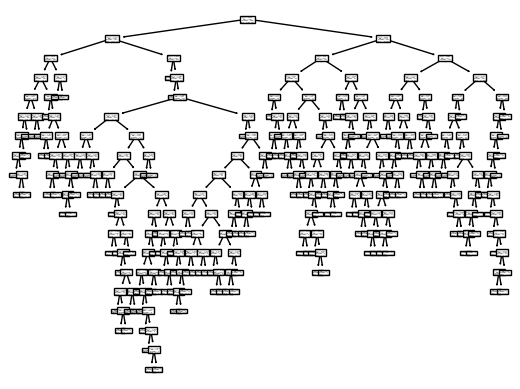

In [41]:
tree.plot_tree(model)

In [42]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model_1, out_file=None)
graph_rice_1 = graphviz.Source(dot_data)
graph_rice_1.render("rice_1")

'rice_1.pdf'

In [43]:
y_pred_1 = model_1.predict(X_validNormalized)
print('Printing evaluation Metrics for the model')
precision_1 = precision_score(y_validNormalized, y_pred_1)
recall_1 = recall_score(y_validNormalized, y_pred_1)
f1_score_1 = f1_score(y_validNormalized, y_pred_1)

print("Precision: ", precision_1)
print("Recall: ", recall_1)
print("F-1 Score: ", f1_score_1)

Printing evaluation Metrics for the model
Precision:  0.8952380952380953
Recall:  0.8571428571428571
F-1 Score:  0.8757763975155279


# Decision Tree for Model 3

Dataset is scaled and oversampled

In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_trainOversampledScaled, y_trainOversampledScaled = ros.fit_resample(X_trainNormalized, y_trainNormalized)
X_validOversampledScaled, y_validOversampledScaled = ros.fit_resample(X_validNormalized, y_validNormalized)

[Text(0.5105566756272402, 0.9705882352941176, 'x[2] <= 0.131\ngini = 0.5\nsamples = 2670\nvalue = [1335, 1335]'),
 Text(0.2783378136200717, 0.9117647058823529, 'x[2] <= -0.253\ngini = 0.119\nsamples = 1321\nvalue = [1237, 84]'),
 Text(0.13149641577060933, 0.8529411764705882, 'x[2] <= -0.412\ngini = 0.048\nsamples = 1095\nvalue = [1068, 27]'),
 Text(0.06586021505376344, 0.7941176470588235, 'x[6] <= 2.073\ngini = 0.023\nsamples = 960\nvalue = [949, 11]'),
 Text(0.04390681003584229, 0.7352941176470589, 'x[6] <= -1.268\ngini = 0.021\nsamples = 958\nvalue = [948, 10]'),
 Text(0.021505376344086023, 0.6764705882352942, 'x[0] <= -1.114\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.014336917562724014, 0.6176470588235294, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.02867383512544803, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06630824372759857, 0.6764705882352942, 'x[1] <= -0.374\ngini = 0.017\nsamples = 949\nvalue = [941, 8]'),
 Text(0.04301075268817

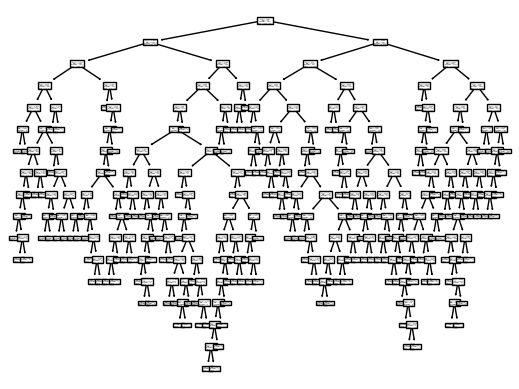

In [45]:
model_2 = tree_classifier.fit(X_trainOversampledScaled, y_trainOversampledScaled)
tree.plot_tree(model_2)

In [46]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model_2, out_file=None)
graph_rice_2 = graphviz.Source(dot_data)
graph_rice_2.render("rice_2")

'rice_2.pdf'

In [47]:
y_pred_2 = model_2.predict(X_validOversampledScaled)
print('Printing evaluation Metrics for the model')
precision_2 = precision_score(y_validOversampledScaled, y_pred_2)
recall_2 = recall_score(y_validOversampledScaled, y_pred_2)
f1_score_2 = f1_score(y_validOversampledScaled, y_pred_2)

print("Precision: ", precision_2)
print("Recall: ", recall_2)
print("F-1 Score: ", f1_score_2)

Printing evaluation Metrics for the model
Precision:  0.9023255813953488
Recall:  0.8960739030023095
F-1 Score:  0.899188876013905
